## OCEANAIR Business Transaction Review - Jan - June 2020

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 150)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Read in the dataset
df = pd.read_excel('data/CUSTOMER_BUSINESS_REVIEW_Jan-June.xlsx')

### Obtaining the overall trend for January through July 2020

In [3]:
# Get the Month-Year from Report Date
df['Month_Year'] = df['REPORT DATE'].apply(lambda x: x.strftime('%Y-%m'))

In [4]:
results = df.groupby('Month_Year').sum()
months = [month for month, df in df.groupby('Month_Year')]

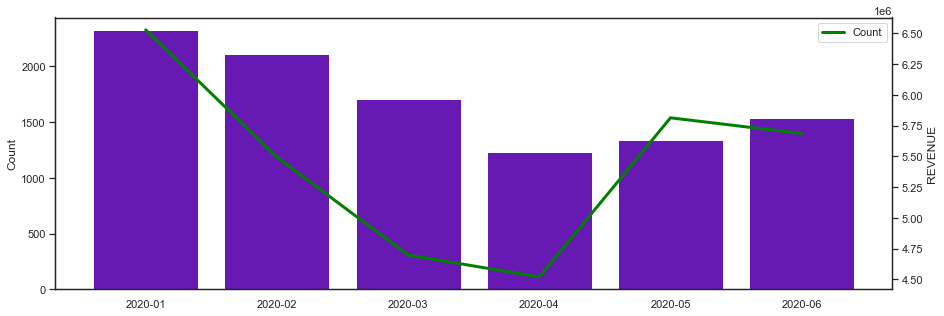

In [5]:
sns.set(style='white', rc={'lines.linewidth': 3})

fig, ax1 = plt.subplots(figsize=(15, 5))
ax2 = ax1.twinx()

sns.barplot(x=months,
            y=results['Count'],
            color='#6600CC',
            ax=ax1)
sns.lineplot(x=months,
             y=results['REVENUE'],
             color='green',
             ax=ax2)

plt.legend(labels=['Count', 'REVENUE'])
plt.show()
sns.set()

### Obtaining the Month-over-Month, Quarter-over-Quarter and Year-over-Year

#### Month over Month

In [6]:
mom_df = pd.DataFrame(results['Count'])
mom_df['Last_Month'] = np.roll(mom_df['Count'], 1)
mom_df = mom_df.drop(mom_df.index[0])

mom_df

,Count,Last_Month
Month_Year,,
2020-02,2115,2323
2020-03,1706,2115
2020-04,1234,1706
2020-05,1344,1234
2020-06,1537,1344


#### Add the Growth to the Month over Month Dataframe

In [7]:

# calculating the growth
mom_df['Growth'] = (mom_df['Count'] / mom_df['Last_Month']) - 1
mom_df

,Count,Last_Month,Growth
Month_Year,,,
2020-02,2115,2323,-0.089539
2020-03,1706,2115,-0.193381
2020-04,1234,1706,-0.276671
2020-05,1344,1234,0.089141
2020-06,1537,1344,0.143601


#### Plotting the Month-over-Month Growth

In [8]:
results = mom_df.drop(columns=['Count', 'Last_Month'])
results['Months'] = results.index
results.reset_index(drop=True, inplace=True)
results

,Growth,Months
0,-0.089539,2020-02
1,-0.193381,2020-03
2,-0.276671,2020-04
3,0.089141,2020-05
4,0.143601,2020-06


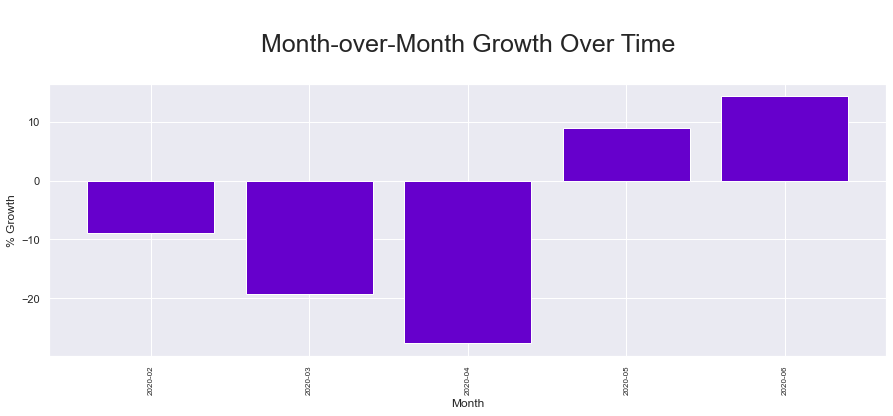

In [9]:
plt.figure(figsize=(15, 5))
plt.bar(results['Months'], results['Growth'] * 100, color='#6600CC')
plt.xticks(results['Months'], rotation='vertical', size=8)
plt.ylabel('% Growth')
plt.xlabel('Month')
plt.title("\n Month-over-Month Growth Over Time \n", size=25)
#plt.grid()
plt.show()